# **Toronto Neighborhood**
### **Hi Welcome to the IBM Data Science Capstone Project**
#### *This notebook is for the Capstone project for the IBM Data Science certification course week 3*

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

Removed all scripts from html file and load it

In [2]:
url = '../input/toronto-data/Toronto.html'
with open(url, encoding='utf8') as file:
    soup = BeautifulSoup(file)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
</head>
<body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-List_of_postal_codes_of_Canada_M rootpage-List_of_postal_codes_of_Canada_M skin-vector action-view skin-vector-legacy"><div class="noprint" id="mw-page-base"></div>
<div class="noprint" id="mw-head-base"></div>
<div class="mw-body" id="content" role="main">
<a id="top"></a>
<div class="mw-body-content" id="siteNotice"><!-- CentralNotice --></div>
<div class="mw-indicators mw-body-content">
</div>
<h1 class="firstHeading" id="firstHeading" lang="en">List of postal codes of Canada: M</h1>
<div class="mw-body-content" id="bodyContent">
<div class="noprint" id="siteSub">From Wikipedia, the free encyclopedia</div>
<div id="contentSub"></div>
<div id="contentSub2"></div>
<div id="jump-to-nav"></div>
<a class="mw-jump-link" href="#mw-head">Jump

In [3]:
# Find all the table headers
soup.find_all('th')

[<th>Postal Code
 </th>,
 <th>Borough
 </th>,
 <th>Neighbourhood
 </th>,
 <th class="navbox-title" style="font-size:110%"><a href="/wiki/Postal_codes_in_Canada" title="Postal codes in Canada">Canadian postal codes</a>
 </th>]

In [4]:
# Initiate an empty list
columns = []

# Loop to the first 3 elements of the list
for i in range(3):
    column = list(soup.find_all('th')[i].stripped_strings)[0]
    column = column.replace(" ", "")
    columns.append(column)

print(columns)

# Create an empty dataframe
toronto_df = pd.DataFrame(columns=columns)
toronto_df.head()

['PostalCode', 'Borough', 'Neighbourhood']


,PostalCode,Borough,Neighbourhood


**Converting data into pandas DataFrame**

In [5]:
# Get the first table tag and find all <tr> tag in the form of list
tableData = soup.table.find_all('tr')

# Filter the first row of the table since it contains only the table header tags
tableData = tableData[1:]

print('The original postal code table contains {} rows'.format(len(tableData)))

The original postal code table contains 180 rows


In [6]:
list(tableData[0].stripped_strings)

['M1A', 'Not assigned', 'Not assigned']

In [7]:
for i in range(len(tableData)):
    data = list(tableData[i].stripped_strings)
    
    if (data[1] == 'Not assigned'):
        continue
    
    postalCode = data[0]
    borough = data[1]
    
    if (data[2] != 'Not assigned'):
        neighborhood = data[2]
    else:
        neighborhood = borough
    
    toronto_df = toronto_df.append({'PostalCode': postalCode,
                                        'Borough': borough,
                                        'Neighbourhood': neighborhood}, ignore_index=True)

In [8]:
# Save the dataframe in a csv file without containing any index
toronto_df.to_csv('toronto_postal_codes.csv', index=False)

# Print the first 5 data of dataframe
toronto_df.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
toronto_df.shape

(103, 3)

In [11]:
 !pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 1.0 MB/s eta 0:00:01


In [12]:
coord = geocoder.arcgis('M3A, Toronto, Ontario')
coord.latlng

[43.75245000000007, -79.32990999999998]

In [13]:
coord_df = pd.DataFrame(columns=['postal_code','latitude', 'longitude'])
coord_df.head()

,postal_code,latitude,longitude


In [14]:
coordinate = None
for poscode in toronto_df.PostalCode.to_list():
    # print(poscode)
    while (coordinate is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(poscode))
        coordinate = g.latlng
        # print(coordinate)
       
    coord_df = coord_df.append({'postal_code': poscode, 
                                'latitude': coordinate[0], 
                                'longitude': coordinate[1]}, ignore_index=True)
    coordinate = None

coord_df.head()

,postal_code,latitude,longitude
0,M3A,43.75245,-79.32991
1,M4A,43.73057,-79.31306
2,M5A,43.65512,-79.36264
3,M6A,43.72327,-79.45042
4,M7A,43.66253,-79.39188


In [23]:
toronto_df = pd.concat([toronto_df, coord_df[['latitude', 'longitude']]], axis=1)

In [24]:
toronto_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


In [25]:
# Save the new dataframe to a new csv file
toronto_df.to_csv('toronto_poscode_latlng.csv', index=False)

# Print the shape of the new dataframe
toronto_df.shape

(103, 5)

### **Map: Toronto & Neighborhoods**

In [26]:
from geopy.geocoders import Nominatim
print('The dataframe has {} boroughs and {} postal codes.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 postal codes.


In [27]:
address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.


In [28]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['latitude'], toronto_df['longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Map: A Borough and Neighborhoods

In [29]:
toronto_df.groupby(by='Borough').count().sort_values(by='Neighbourhood', ascending=False)

,PostalCode,Neighbourhood,latitude,longitude
Borough,,,,
North York,24,24,24,24
Downtown Toronto,19,19,19,19
Scarborough,17,17,17,17
Etobicoke,12,12,12,12
Central Toronto,9,9,9,9
West Toronto,6,6,6,6
East Toronto,5,5,5,5
East York,5,5,5,5
York,5,5,5,5


In [30]:
# downtown_df = toronto_df[toronto_df.Borough.str.contains('Toronto') == True].reset_index(drop=True)
# downtown_df = toronto_df[(toronto_df['Borough']=='Downtown Toronto') | (toronto_df['Borough']=='Etobicoke')].reset_index(drop=True)

boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='East York') | (toronto_df['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(19, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [31]:
boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])

boroughs_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349
5,M4H,East York,Thorncliffe Park,43.70142,-79.34905
6,M4J,East York,East Toronto,43.68811,-79.33418
7,M6M,York,Del Ray,43.69517,-79.48397
8,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713
9,M5N,Central Toronto,Roselawn,43.71208,-79.41848


Let's get the geographical coordinates of Toronto.



In [32]:
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.65238435, -79.38356765.


Let's visualize Downtown Toronto and Etobicokewith neighborhoods.



In [33]:
# create map of Toronto using latitude and longitude values
map_Boroughs = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(boroughs_df['latitude'], boroughs_df['longitude'], boroughs_df['Borough'], boroughs_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boroughs)  
    
map_Boroughs

### **Explore a Neighborhood in The Selected Boroughs**

In [34]:
# @hidden_cell
CLIENT_ID = 'OHR3BAMDFLIM4RRWITDJKNJ03FC3SNSZ5LKBILBCKSZVYHJM' # your Foursquare ID
CLIENT_SECRET = 'YGFFJ1BEUQ0E2PEN5C2YAVRXK0BXJTBSC35C0RLS1G21Q42V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [35]:
boroughs_df.head(1)

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192


In [36]:
print('First neighborhood: {}'.format(boroughs_df.loc[0,'Neighbourhood']))

First neighborhood: Parkview Hill


In [37]:
neighborhood_latitude = boroughs_df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = boroughs_df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = boroughs_df.loc[0, 'Neighbourhood'] # neighborhood name

print('The coordinate values of {} are\n- latitude: {},\n- longitude: {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


The coordinate values of Parkview Hill are
- latitude: 43.70718000000005,
- longitude: -79.31191999999999.


In [38]:
LIMIT = 100
RADIUS = 750

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude,
        RADIUS,
        LIMIT)

In [39]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60f448c93f486416d0807e9f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': "O'Connor - Parkview",
  'headerFullLocation': "O'Connor - Parkview, Toronto",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': 43.713930006750054,
    'lng': -79.30259978299036},
   'sw': {'lat': 43.70042999325005, 'lng': -79.32124021700962}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6db61ff964a520b9882ce3',
       'name': 'Toronto Climbing Academy',
       'location': {'address': '11 Curity Ave',
        'lat': 43.709362,
        'lng': -79.315006,
        'labeledLatLngs': [{'label': 'display',
          

In [40]:
results['response']['groups'][0]['items']


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b6db61ff964a520b9882ce3',
   'name': 'Toronto Climbing Academy',
   'location': {'address': '11 Curity Ave',
    'lat': 43.709362,
    'lng': -79.315006,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.709362,
      'lng': -79.315006}],
    'distance': 347,
    'postalCode': 'M4B 1X4',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['11 Curity Ave', 'Toronto ON M4B 1X4', 'Canada']},
   'categories': [{'id': '50328a4b91d4c4b30a586d6b',
     'name': 'Rock Climbing Spot',
     'pluralName': 'Rock Climbing Spots',
     'shortName': 'Rock Climbing',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/rockclimbing_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4b

In [41]:
import json # library to handle JSON files
from pandas import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.neighborhood
0,e-0-4b6db61ff964a520b9882ce3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b6db61ff964a520b9882ce3,Toronto Climbing Academy,11 Curity Ave,43.709362,-79.315006,"[{'label': 'display', 'lat': 43.709362, 'lng':...",347,...,CA,Toronto,ON,Canada,"[11 Curity Ave, Toronto ON M4B 1X4, Canada]","[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",0,[],NaN,NaN
1,e-0-4b5a3842f964a52023b528e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b5a3842f964a52023b528e3,Jawny Bakers,804 O'Connor Dr,43.705783,-79.312913,"[{'label': 'display', 'lat': 43.705782646822, ...",174,...,CA,Toronto,ON,Canada,"[804 O'Connor Dr (St Clair E), Toronto ON M4B ...","[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",0,[],St Clair E,NaN


In [42]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Toronto Climbing Academy,"[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",43.709362,-79.315006
1,Jawny Bakers,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",43.705783,-79.312913


In [43]:
nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(lambda x: x[0]['name'])
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006
1,Jawny Bakers,Gastropub,43.705783,-79.312913


In [44]:
nearby_venues.columns = [column.split('.')[-1] for column in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

22 venues were returned by Foursquare.


,name,categories,lat,lng
0,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006
1,Jawny Bakers,Gastropub,43.705783,-79.312913
2,East York Gymnastics,Gym / Fitness Center,43.710654,-79.309279
3,Muddy York Brewing Co.,Brewery,43.712362,-79.312019
4,Peek Freans Cookie Outlet,Bakery,43.713260,-79.308063


In [45]:
# get_nerby_venues(downtown_df['neighbourhood'], downtown_df['latitude'], downtown_df['longitude'])
# Return downtown_venues
def get_nearby_venues(neighborhoods, latitudes, longitudes):
    
    # Define default resul limit and radius
    LIMIT = 100
    RADIUS = 1000
    
    # Define an empty venue list
    venues_list = []
    
    # Loop for each neighborhood (i.e. 1st neighborhood = Regent Park)
    for neighborhood, lat, lng in zip(neighborhoods, latitudes, longitudes):
        # Confirm the name of naighborhood
        print(neighborhood) # Regent Park
        
        # Create an API URL for each neighborhood to explore its venues
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                RADIUS,
                LIMIT)
        
        # Make the GET request and return a JSON file
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information for each nearby venue (explanation is below the notebook)
        venues_list.append([(neighborhood, 
                            lat, 
                            lng,  
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])    
    nearby_venues.columns = ['Neighborhood', 
          'Neighborhood Latitude', 
          'Neighborhood Longitude', 
          'Venue', 
          'Venue Latitude', 
          'Venue Longitude', 
          'Venue Category']
    
    return(nearby_venues)

In [46]:
# type your answer here
boroughs_venues = get_nearby_venues(boroughs_df['Neighbourhood'], 
                                   boroughs_df['latitude'], 
                                   boroughs_df['longitude'])

Parkview Hill
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
East Toronto
Del Ray
Lawrence Park
Roselawn
Runnymede
Weston
Davisville North
Forest Hill North & West
North Toronto West
The Annex
Davisville
Moore Park
Summerhill West


In [48]:
print(boroughs_venues.shape)
boroughs_venues.to_csv('boroughs_venues.csv', index=False)
boroughs_venues.head()

(910, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
3,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery


In [49]:
boroughs_venues[boroughs_venues.Neighborhood=='Roselawn']


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
325,Roselawn,43.71208,-79.41848,Belt Line Trail,43.704396,-79.424254,Trail
326,Roselawn,43.71208,-79.41848,Forest Hill Arena,43.704289,-79.420367,Skating Rink
327,Roselawn,43.71208,-79.41848,TD Canada Trust,43.712212,-79.428233,Bank
328,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.712652,-79.428040,Pharmacy
329,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.703442,-79.415367,Pharmacy
330,Roselawn,43.71208,-79.41848,Lytton Park,43.714954,-79.411970,Playground
331,Roselawn,43.71208,-79.41848,Jewel & Java Café,43.712467,-79.427999,Café


In [50]:
boroughs_venues.groupby( by='Neighborhood').count().sort_values(by='Venue', ascending=False)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,100,100,100,100,100,100
Davisville North,100,100,100,100,100,100
The Annex,100,100,100,100,100,100
Summerhill West,85,85,85,85,85,85
Woodbine Heights,69,69,69,69,69,69
Moore Park,63,63,63,63,63,63
Leaside,59,59,59,59,59,59
East Toronto,58,58,58,58,58,58
North Toronto West,55,55,55,55,55,55


In [51]:
print('There are {} unique venue categories.'.format(len(boroughs_venues['Venue Category'].unique())))


There are 173 unique venue categories.


#### **Analyze Each Neighborhood**

In [52]:
# one hot encoding and adjust the name prefix
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to the dataframe
boroughs_onehot['Neighbourhood'] = boroughs_venues['Neighborhood']

# # move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]
boroughs_onehot.head()

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
boroughs_grouped = boroughs_onehot.groupby(by='Neighbourhood').mean().reset_index()
boroughs_grouped

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.040000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.04,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.010000
2,Davisville North,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.00,0.020000
3,Del Ray,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
4,East Toronto,0.000000,0.000000,0.034483,0.000000,0.00,0.017241,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
5,Forest Hill North & West,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
6,Humewood-Cedarvale,0.000000,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.027027,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
7,Lawrence Park,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
8,Leaside,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.016949,0.016949,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
9,Moore Park,0.000000,0.000000,0.015873,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.00,0.00,0.015873


In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # Add column names such as 1st, 2nd, 3rd Most Common Venue
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        # Add column names such as 4th, 5th, .. ,10th Most Common Venue
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# In the end, we have:
# columns == ['Neighborhood', '1st Most Common Venue', .. , '10th Most Common Venue']        

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighbourhood']

for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)

In [56]:
neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Park,Pizza Place,Japanese Restaurant,Beer Store,ATM,Seafood Restaurant,Café,Rental Service,Mexican Restaurant,Coffee Shop
1,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Indian Restaurant,Café,Bakery,Restaurant,Pizza Place,Bank,Dessert Shop
2,Davisville North,Coffee Shop,Pizza Place,Italian Restaurant,Dessert Shop,Café,Fast Food Restaurant,Restaurant,Sushi Restaurant,Pharmacy,Park
3,Del Ray,ATM,Fast Food Restaurant,Intersection,Grocery Store,Coffee Shop,Sandwich Place,Gas Station,Park,Movie Theater,Museum
4,East Toronto,Coffee Shop,Café,Pizza Place,Thai Restaurant,Ethiopian Restaurant,Park,Sandwich Place,Beer Bar,Beer Store,Gastropub


### **Cluster the Neighborhoods**

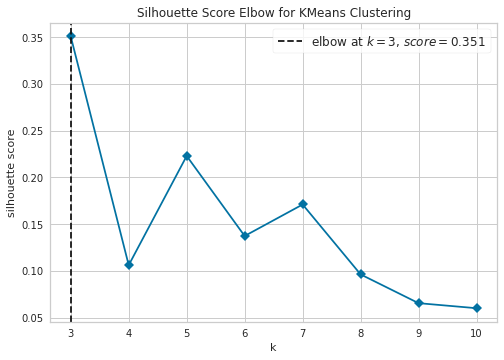

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# set number of clusters
# kclusters = 6
kclusters = (3,11)

boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)
model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(boroughs_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

In [58]:
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 0, 0],
      dtype=int32)

In [59]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Pizza Place,Coffee Shop,Rock Climbing Spot,Gym / Fitness Center,Café,Flea Market,Soccer Stadium,Office,Gastropub,Brewery,0
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Playground,Coffee Shop,Pizza Place,Ice Cream Shop,Park,Bus Line,Grocery Store,Sushi Restaurant,Metro Station,Café,0
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Park,Sushi Restaurant,Bus Line,Mexican Restaurant,Caribbean Restaurant,Soccer Stadium,Sandwich Place,0
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Park,Pizza Place,Japanese Restaurant,Beer Store,ATM,Seafood Restaurant,Café,Rental Service,Mexican Restaurant,Coffee Shop,0
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sushi Restaurant,Restaurant,Sandwich Place,Sports Bar,Department Store,3


In [60]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,0,Pizza Place,Coffee Shop,Rock Climbing Spot,Gym / Fitness Center,Café,Flea Market,Soccer Stadium,Office,Gastropub,Brewery
1,East York,Woodbine Heights,0,Playground,Coffee Shop,Pizza Place,Ice Cream Shop,Park,Bus Line,Grocery Store,Sushi Restaurant,Metro Station,Café
2,York,Humewood-Cedarvale,0,Pizza Place,Coffee Shop,Convenience Store,Park,Sushi Restaurant,Bus Line,Mexican Restaurant,Caribbean Restaurant,Soccer Stadium,Sandwich Place
3,York,Caledonia-Fairbanks,0,Park,Pizza Place,Japanese Restaurant,Beer Store,ATM,Seafood Restaurant,Café,Rental Service,Mexican Restaurant,Coffee Shop
4,East York,Leaside,3,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sushi Restaurant,Restaurant,Sandwich Place,Sports Bar,Department Store
5,East York,Thorncliffe Park,3,Indian Restaurant,Coffee Shop,Grocery Store,Restaurant,Afghan Restaurant,Turkish Restaurant,Yoga Studio,Greek Restaurant,Supermarket,Gas Station
6,East York,East Toronto,3,Coffee Shop,Café,Pizza Place,Thai Restaurant,Ethiopian Restaurant,Park,Sandwich Place,Beer Bar,Beer Store,Gastropub
7,York,Del Ray,2,ATM,Fast Food Restaurant,Intersection,Grocery Store,Coffee Shop,Sandwich Place,Gas Station,Park,Movie Theater,Museum
8,Central Toronto,Lawrence Park,3,Café,Bus Line,Trail,College Quad,College Gym,Coffee Shop,Park,Bookstore,Restaurant,Gym / Fitness Center
9,Central Toronto,Roselawn,1,Pharmacy,Bank,Café,Playground,Skating Rink,Trail,Paper / Office Supplies Store,Modern European Restaurant,Movie Theater,Museum


In [61]:
temp = boroughs_merged[[column for column in boroughs_merged.columns if (column.startswith('1st')) | (column.startswith('2')) | (column.startswith('3')) | (column=='Cluster Labels')]]
temp

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,Pizza Place,Coffee Shop,Rock Climbing Spot,0
1,Playground,Coffee Shop,Pizza Place,0
2,Pizza Place,Coffee Shop,Convenience Store,0
3,Park,Pizza Place,Japanese Restaurant,0
4,Coffee Shop,Sporting Goods Shop,Grocery Store,3
5,Indian Restaurant,Coffee Shop,Grocery Store,3
6,Coffee Shop,Café,Pizza Place,3
7,ATM,Fast Food Restaurant,Intersection,2
8,Café,Bus Line,Trail,3
9,Pharmacy,Bank,Café,1


### **Examine Clusters**

In [62]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['latitude'], boroughs_merged['longitude'], boroughs_merged['Neighbourhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

**Cluster 1**

In [63]:
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_0

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Parkview Hill,Pizza Place,Coffee Shop,Rock Climbing Spot,Gym / Fitness Center,Café,Flea Market,Soccer Stadium,Office,Gastropub,Brewery,0
1,Woodbine Heights,Playground,Coffee Shop,Pizza Place,Ice Cream Shop,Park,Bus Line,Grocery Store,Sushi Restaurant,Metro Station,Café,0
2,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Park,Sushi Restaurant,Bus Line,Mexican Restaurant,Caribbean Restaurant,Soccer Stadium,Sandwich Place,0
3,Caledonia-Fairbanks,Park,Pizza Place,Japanese Restaurant,Beer Store,ATM,Seafood Restaurant,Café,Rental Service,Mexican Restaurant,Coffee Shop,0
10,Runnymede,Gas Station,Brewery,Department Store,BBQ Joint,Indian Restaurant,Beer Store,Pizza Place,Sandwich Place,Pet Store,Coffee Shop,0
11,Weston,Train Station,Pizza Place,Coffee Shop,Soccer Field,Fried Chicken Joint,Laundromat,Skating Rink,Sandwich Place,Restaurant,Grocery Store,0


**Cluster 2**

In [64]:
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_1.shape)
cluster_1

(1, 12)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,Roselawn,Pharmacy,Bank,Café,Playground,Skating Rink,Trail,Paper / Office Supplies Store,Modern European Restaurant,Movie Theater,Museum,1


In [65]:
first = cluster_1.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first

,Venue,Neighbourhood
0,Pharmacy,1


In [66]:
second = cluster_1[['Neighbourhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
second.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second

,Venue,Neighbourhood
0,Bank,1


In [67]:
third = cluster_1[['Neighbourhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
third.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third

,Venue,Neighbourhood
0,Café,1


In [68]:
cluster_0_top3 = pd.concat([first, second, third])
cluster_0_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighbourhood', ascending=False)
cluster_0_top3

,Neighbourhood
Venue,
Bank,1
Café,1
Pharmacy,1


**Cluster 3**

In [70]:
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Del Ray,ATM,Fast Food Restaurant,Intersection,Grocery Store,Coffee Shop,Sandwich Place,Gas Station,Park,Movie Theater,Museum,2


**Cluster 4**

In [71]:
cluster_3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
4,Leaside,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sushi Restaurant,Restaurant,Sandwich Place,Sports Bar,Department Store,3
5,Thorncliffe Park,Indian Restaurant,Coffee Shop,Grocery Store,Restaurant,Afghan Restaurant,Turkish Restaurant,Yoga Studio,Greek Restaurant,Supermarket,Gas Station,3
6,East Toronto,Coffee Shop,Café,Pizza Place,Thai Restaurant,Ethiopian Restaurant,Park,Sandwich Place,Beer Bar,Beer Store,Gastropub,3
8,Lawrence Park,Café,Bus Line,Trail,College Quad,College Gym,Coffee Shop,Park,Bookstore,Restaurant,Gym / Fitness Center,3
12,Davisville North,Coffee Shop,Pizza Place,Italian Restaurant,Dessert Shop,Café,Fast Food Restaurant,Restaurant,Sushi Restaurant,Pharmacy,Park,3
13,Forest Hill North & West,Café,Italian Restaurant,Bank,Sushi Restaurant,Coffee Shop,Park,Pharmacy,Salon / Barbershop,Sandwich Place,Liquor Store,3
14,North Toronto West,Coffee Shop,Italian Restaurant,Restaurant,Sporting Goods Shop,Playground,Diner,Mexican Restaurant,Café,Skating Rink,Park,3
15,The Annex,Coffee Shop,Italian Restaurant,Gym,Pub,Café,History Museum,Vegetarian / Vegan Restaurant,Mexican Restaurant,Pharmacy,Pizza Place,3
16,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Indian Restaurant,Café,Bakery,Restaurant,Pizza Place,Bank,Dessert Shop,3
17,Moore Park,Coffee Shop,Grocery Store,Italian Restaurant,Gym,Thai Restaurant,Park,Pharmacy,Bank,Café,Pizza Place,3


In [72]:
cluster_merged = pd.concat([ cluster_0, cluster_2, cluster_3]).reset_index()
column = [column for column in cluster_merged.columns if column.endswith('Venue')]
cluster_merged[['Cluster Labels','Neighbourhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,Parkview Hill,Pizza Place,Coffee Shop,Rock Climbing Spot,Gym / Fitness Center,Café
0,Woodbine Heights,Playground,Coffee Shop,Pizza Place,Ice Cream Shop,Park
0,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Park,Sushi Restaurant
0,Caledonia-Fairbanks,Park,Pizza Place,Japanese Restaurant,Beer Store,ATM
0,Runnymede,Gas Station,Brewery,Department Store,BBQ Joint,Indian Restaurant
0,Weston,Train Station,Pizza Place,Coffee Shop,Soccer Field,Fried Chicken Joint
2,Del Ray,ATM,Fast Food Restaurant,Intersection,Grocery Store,Coffee Shop
3,Leaside,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store
3,Thorncliffe Park,Indian Restaurant,Coffee Shop,Grocery Store,Restaurant,Afghan Restaurant
